# Apache PySpark by Example

**[June 2023 update]**

I've consolidated all the notebooks for this course into a single notebook. (The course videos will still show individual notebooks)


## Introduction to Google Colab

### Access to the shell

## Install Spark

- Google colab recently made some changes which breaks the Spark installation.
- Please use the code below where we install from the pyspark package instead

In [ ]:
!pip install pyspark==3.5.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425346 sha256=7fe92fdb062e086ba36d6921c00b15d42a5fb869a035f2426239ba2a5e567ad1
  Stored in directory: /root/.cache/pip/wheels/38/df/61/8c121f50c3cffd77f8178180dd232d90b3b99d1bd61fb6d6be
Successfully built pyspark
  Attempting uninstall: pyspark
    Found existing installation: pyspark 3.4.0
    Uninstalling pyspark-3.4.0:
      Successfully uninstalled pyspark-3.4.0


In [3]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark

## (02-02) Download Chicago's Reported Crime Data

### Downloading and preprocessing Chicago's Reported Crime Data

In [6]:
!wget https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD
!ls -l

--2025-04-07 05:41:08--  https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.140.205, 52.206.140.199, 52.206.68.26
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.140.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD’

rows.csv?accessType     [  <=>               ]   1.82G  3.06MB/s    in 11m 25s 

2025-04-07 05:52:33 (2.73 MB/s) - ‘rows.csv?accessType=DOWNLOAD’ saved [1958359216]

total 1912472
-rw-r--r-- 1 root root 1958359216 Apr  6 11:18 'rows.csv?accessType=DOWNLOAD'
drwxr-xr-x 1 root root       4096 Apr  3 13:37  sample_data


In [9]:
!mv rows.csv\?accessType\=DOWNLOAD reported-crimes.csv
!ls -l

total 1912472
-rw-r--r-- 1 root root 1958359216 Apr  6 11:18 reported-crimes.csv
drwxr-xr-x 1 root root       4096 Apr  3 13:37 sample_data


In [37]:
from pyspark.sql.functions import to_timestamp,col,lit
rc = spark.read.csv('reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') <= lit('2018-11-11'))

rc.show(5)

+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|       Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|11227634|   JB147599|2017-08-26 10:00:00| 001XX W RANDOLPH ST|0281|CRIM SEXUAL ASSAULT|      NON-AGGRAVATED|         HOTEL/MOTEL|

## (03-03) Schemas

In [11]:
rc.schema

StructType([StructField('ID', StringType(), True), StructField('Case Number', StringType(), True), StructField('Date', TimestampType(), True), StructField('Block', StringType(), True), StructField('IUCR', StringType(), True), StructField('Primary Type', StringType(), True), StructField('Description', StringType(), True), StructField('Location Description', StringType(), True), StructField('Arrest', StringType(), True), StructField('Domestic', StringType(), True), StructField('Beat', StringType(), True), StructField('District', StringType(), True), StructField('Ward', StringType(), True), StructField('Community Area', StringType(), True), StructField('FBI Code', StringType(), True), StructField('X Coordinate', StringType(), True), StructField('Y Coordinate', StringType(), True), StructField('Year', StringType(), True), StructField('Updated On', StringType(), True), StructField('Latitude', StringType(), True), StructField('Longitude', StringType(), True), StructField('Location', StringTy

In [ ]:
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)



In [14]:
from pyspark.sql.types import IntegerType, StringType, StructField, TimestampType, BooleanType, DoubleType, StructType

In [15]:
# rc.columns # command to see all columns in table
from pyspark.sql.types import *

rc_labels = [
    ('ID', StringType()),
    ('Case Number', StringType()),
    ('Date', TimestampType()),
    ('Block', StringType()),
    ('IUCR', StringType()),
    ('Primary Type', StringType()),
    ('Description', StringType()),
    ('Location Description', StringType()),
    ('Arrest', StringType()),
    ('Domestic', BooleanType()),
    ('Beat', StringType()),
    ('District', StringType()),
    ('Ward', StringType()),
    ('Community Area', StringType()),
    ('FBI Code', StringType()),
    ('X Coordinate', StringType()),
    ('Y Coordinate', StringType()),
    ('Year', IntegerType()),
    ('Updated On', StringType()),
    ('Latitude', DoubleType()),
    ('Longitude', DoubleType()),
    ('Location', StringType())
]

In [16]:
schema = StructType([StructField (x[0], x[1],True) for x in rc_labels])
schema

StructType([StructField('ID', StringType(), True), StructField('Case Number', StringType(), True), StructField('Date', TimestampType(), True), StructField('Block', StringType(), True), StructField('IUCR', StringType(), True), StructField('Primary Type', StringType(), True), StructField('Description', StringType(), True), StructField('Location Description', StringType(), True), StructField('Arrest', StringType(), True), StructField('Domestic', BooleanType(), True), StructField('Beat', StringType(), True), StructField('District', StringType(), True), StructField('Ward', StringType(), True), StructField('Community Area', StringType(), True), StructField('FBI Code', StringType(), True), StructField('X Coordinate', StringType(), True), StructField('Y Coordinate', StringType(), True), StructField('Year', IntegerType(), True), StructField('Updated On', StringType(), True), StructField('Latitude', DoubleType(), True), StructField('Longitude', DoubleType(), True), StructField('Location', String

In [33]:
rc = spark.read.csv('reported-crimes.csv', schema=schema)
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)



## (03-04) Working with columns

**Display only the first 5 rows of the column name IUCR**

In [20]:
rc.select('IUCR').show(4)

+----+
|IUCR|
+----+
|IUCR|
|1582|
|2017|
|0281|
+----+
only showing top 4 rows



In [21]:
rc.select(col('IUCR')).show(5)

+----+
|IUCR|
+----+
|IUCR|
|1582|
|2017|
|0281|
|1320|
+----+
only showing top 5 rows



  **Display only the first 4 rows of the column names Case Number, Date and Arrest**

In [23]:
rc.select('Case Number', 'Date', 'Arrest').show(4)

+-----------+----+------+
|Case Number|Date|Arrest|
+-----------+----+------+
|Case Number|NULL|Arrest|
|   JG503434|NULL|  true|
|   JG103252|NULL|  true|
|   JB147599|NULL| false|
+-----------+----+------+
only showing top 4 rows



**Add a column with name One, with entries all 1s**

In [24]:
from pyspark.sql.functions import lit

In [25]:
rc.withColumn('One', lit(1)).show(5)

+--------+-----------+----+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+---+
|      ID|Case Number|Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|One|
+--------+-----------+----+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+---+
|      ID|Case Number|NULL|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|    NULL|Beat|District|Ward|Community

**Remove the column IUCR**

In [26]:
rc = rc.drop('One')

In [27]:
rc.columns

['ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

## (03-05) Working with rows

**Add the reported crimes for an additional day, 12-Nov-2018, to our dataset.**

In [30]:
one_day = spark.read.csv('reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') == lit('2018-11-12'))

In [31]:
one_day.count()

5

In [39]:
rc.union(one_day).orderBy('Date', ascending=False).show(10)

+--------+-----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|      Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|13358766|   JH140578|2018-11-12 00:00:00|     008XX E 63RD ST|1153|DECEPTIVE PRACTICE|FINANCIAL IDENTIT...|           APARTMENT| fal

In [35]:
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)



In [36]:
one_day.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)



**What are the top 10 number of reported crimes by Primary type, in descending order of occurence?**

In [41]:
rc.groupBy('Primary Type').count().orderBy('count', ascending=False).show(10)

+-------------------+-------+
|       Primary Type|  count|
+-------------------+-------+
|              THEFT|1418537|
|            BATTERY|1232304|
|    CRIMINAL DAMAGE| 771526|
|          NARCOTICS| 711780|
|      OTHER OFFENSE| 419058|
|            ASSAULT| 418526|
|           BURGLARY| 388040|
|MOTOR VEHICLE THEFT| 314135|
| DECEPTIVE PRACTICE| 267570|
|            ROBBERY| 255604|
+-------------------+-------+
only showing top 10 rows



## (03-06) Challenge

**What percentage of reported crimes resulted in an arrest?**

In [42]:
rc.select('Arrest').distinct().show()

+------+
|Arrest|
+------+
| false|
|  true|
+------+



In [43]:
rc.filter(col('Arrest')== 'true').count() / rc.select(col('Arrest')).count()

0.2775378572239304

  **What are the top 3 locations for reported crimes?**

In [44]:
rc.groupBy('Location Description').count().show()

+--------------------+------+
|Location Description| count|
+--------------------+------+
|   RAILROAD PROPERTY|    13|
|SCHOOL - PRIVATE ...|    11|
|VEHICLE - COMMERCIAL|    10|
|EXPRESSWAY EMBANK...|     1|
|POLICE FACILITY/V...| 17599|
|RESIDENCE - YARD ...|    90|
|               MOTEL|     5|
|CHA PARKING LOT /...|    21|
|            SIDEWALK|665558|
|PUBLIC GRAMMAR SC...|     1|
|OTHER RAILROAD PR...|     9|
|CTA GARAGE / OTHE...|  9934|
|            CAR WASH|  2775|
|   TRUCKING TERMINAL|     1|
|    AIRPORT/AIRCRAFT| 16114|
|            HOSPITAL|     6|
|MEDICAL/DENTAL OF...|  7095|
|    FEDERAL BUILDING|   783|
|             TRAILER|     3|
|         CTA STATION|  3912|
+--------------------+------+
only showing top 20 rows



In [46]:
rc.groupBy('Location Description').count().orderBy('count', ascending=False).show(3)

+--------------------+-------+
|Location Description|  count|
+--------------------+-------+
|              STREET|1770651|
|           RESIDENCE|1146617|
|           APARTMENT| 699461|
+--------------------+-------+
only showing top 3 rows



## (04-01) Built-in functions

In [47]:
from pyspark.sql import functions

In [48]:
print(dir(functions))

['Any', 'ArrayType', 'Callable', 'Column', 'DataFrame', 'DataType', 'Dict', 'Iterable', 'JVMView', 'List', 'Optional', 'PandasUDFType', 'PySparkTypeError', 'PySparkValueError', 'SparkContext', 'StringType', 'StructType', 'TYPE_CHECKING', 'Tuple', 'Type', 'Union', 'UserDefinedFunction', 'UserDefinedTableFunction', 'ValuesView', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_create_column_from_literal', '_create_lambda', '_create_py_udf', '_create_py_udtf', '_from_numpy_type', '_get_jvm_function', '_get_lambda_parameters', '_invoke_binary_math_function', '_invoke_function', '_invoke_function_over_columns', '_invoke_function_over_seq_of_columns', '_invoke_higher_order_function', '_options_to_str', '_test', '_to_java_column', '_to_seq', '_unresolved_named_lambda_variable', 'abs', 'acos', 'acosh', 'add_months', 'aes_decrypt', 'aes_encrypt', 'aggregate', 'any_value', 'approxCountDistinct', 'approx_count_distinct', 'approx_percentil

### String functions

**Display the Primary Type column in lower and upper characters, and the first 4 characters of the column**

In [49]:
from pyspark.sql.functions import lower, upper, substring

In [50]:
help(substring)

Help on function substring in module pyspark.sql.functions:

substring(str: 'ColumnOrName', pos: int, len: int) -> pyspark.sql.column.Column
    Substring starts at `pos` and is of length `len` when str is String type or
    returns the slice of byte array that starts at `pos` in byte and is of length `len`
    when str is Binary type.
    
    .. versionadded:: 1.5.0
    
    .. versionchanged:: 3.4.0
        Supports Spark Connect.
    
    Notes
    -----
    The position is not zero based, but 1 based index.
    
    Parameters
    ----------
    str : :class:`~pyspark.sql.Column` or str
        target column to work on.
    pos : int
        starting position in str.
    len : int
        length of chars.
    
    Returns
    -------
    :class:`~pyspark.sql.Column`
        substring of given value.
    
    Examples
    --------
    >>> df = spark.createDataFrame([('abcd',)], ['s',])
    >>> df.select(substring(df.s, 1, 2).alias('s')).collect()
    [Row(s='ab')]



In [52]:
rc.select(lower(col('Primary Type')), upper(col('Primary Type')), substring(col('Primary Type'),1 ,4)).show(5)

+-------------------+-------------------+-----------------------------+
|lower(Primary Type)|upper(Primary Type)|substring(Primary Type, 1, 4)|
+-------------------+-------------------+-----------------------------+
|crim sexual assault|CRIM SEXUAL ASSAULT|                         CRIM|
|            robbery|            ROBBERY|                         ROBB|
|            robbery|            ROBBERY|                         ROBB|
|            robbery|            ROBBERY|                         ROBB|
|           burglary|           BURGLARY|                         BURG|
+-------------------+-------------------+-----------------------------+
only showing top 5 rows



### Numeric functions


**Show the oldest date and the most recent date**

In [53]:
from pyspark.sql.functions import min, max

In [54]:
rc.select(min(col('Date')), max(col('Date'))).show(1)

+-------------------+-------------------+
|          min(Date)|          max(Date)|
+-------------------+-------------------+
|2001-01-01 00:00:00|2018-11-11 00:00:00|
+-------------------+-------------------+



### Date

**What is 3 days earlier that the oldest date and 3 days later than the most recent date?**

In [55]:
from pyspark.sql.functions import date_add, date_sub

In [56]:
help(date_add)

Help on function date_add in module pyspark.sql.functions:

date_add(start: 'ColumnOrName', days: Union[ForwardRef('ColumnOrName'), int]) -> pyspark.sql.column.Column
    Returns the date that is `days` days after `start`. If `days` is a negative value
    then these amount of days will be deducted from `start`.
    
    .. versionadded:: 1.5.0
    
    .. versionchanged:: 3.4.0
        Supports Spark Connect.
    
    Parameters
    ----------
    start : :class:`~pyspark.sql.Column` or str
        date column to work on.
    days : :class:`~pyspark.sql.Column` or str or int
        how many days after the given date to calculate.
        Accepts negative value as well to calculate backwards in time.
    
    Returns
    -------
    :class:`~pyspark.sql.Column`
        a date after/before given number of days.
    
    Examples
    --------
    >>> df = spark.createDataFrame([('2015-04-08', 2,)], ['dt', 'add'])
    >>> df.select(date_add(df.dt, 1).alias('next_date')).collect()
    [Ro

In [58]:
rc.select(date_sub(min(col('Date')), 3), date_add(max(col('Date')), 3)).show(1)

+----------------------+----------------------+
|date_sub(min(Date), 3)|date_add(max(Date), 3)|
+----------------------+----------------------+
|            2000-12-29|            2018-11-14|
+----------------------+----------------------+



## (04-02) Working with dates

In [62]:
from pyspark.sql.functions import to_date, to_timestamp, lit

  **2019-12-25 13:30:00**

In [60]:
df = spark.createDataFrame([('2019-12-25 13:30:00',)], ['Christmas'])
df.show(1)

+-------------------+
|          Christmas|
+-------------------+
|2019-12-25 13:30:00|
+-------------------+



In [63]:
df.select(to_date(col('Christmas'), 'yyyy-MM-dd HH:mm:ss'), to_timestamp(col('Christmas'), 'yyyy-MM-dd HH:mm:ss')).show()

+---------------------------------------+--------------------------------------------+
|to_date(Christmas, yyyy-MM-dd HH:mm:ss)|to_timestamp(Christmas, yyyy-MM-dd HH:mm:ss)|
+---------------------------------------+--------------------------------------------+
|                             2019-12-25|                         2019-12-25 13:30:00|
+---------------------------------------+--------------------------------------------+



**25/Dec/2019 13:30:00**

In [64]:
df = spark.createDataFrame([('25/Dec/2019 13:30:00',)], ['Christmas'])
df.show()

+--------------------+
|           Christmas|
+--------------------+
|25/Dec/2019 13:30:00|
+--------------------+



In [65]:
df.select(to_date(col('Christmas'), 'dd/MMM/yyyy HH:mm:ss'), to_timestamp(col('Christmas'), 'dd/MMM/yyyy HH:mm:ss')).show()

+----------------------------------------+---------------------------------------------+
|to_date(Christmas, dd/MMM/yyyy HH:mm:ss)|to_timestamp(Christmas, dd/MMM/yyyy HH:mm:ss)|
+----------------------------------------+---------------------------------------------+
|                              2019-12-25|                          2019-12-25 13:30:00|
+----------------------------------------+---------------------------------------------+



**12/25/2019 01:30:00 PM**

In [67]:
df = spark.createDataFrame([('12/25/2019 01:30:00 PM',)], ['Christmas'])
df.show(1, truncate=False)

+----------------------+
|Christmas             |
+----------------------+
|12/25/2019 01:30:00 PM|
+----------------------+



In [69]:
df.select(to_date(col('Christmas'), 'MM/dd/yyyy hh:mm:ss a'), to_timestamp(col('Christmas'), 'MM/dd/yyyy hh:mm:ss a')).show()

+-----------------------------------------+----------------------------------------------+
|to_date(Christmas, MM/dd/yyyy hh:mm:ss a)|to_timestamp(Christmas, MM/dd/yyyy hh:mm:ss a)|
+-----------------------------------------+----------------------------------------------+
|                               2019-12-25|                           2019-12-25 13:30:00|
+-----------------------------------------+----------------------------------------------+



### Work with DataFrame

In [72]:
nrc = spark.read.csv('reported-crimes.csv', header=True).withColumn('Date', to_timestamp(col('Date'), 'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') == lit('2018-10-10'))
nrc.show(5, truncate=False)

+--------+-----------+-------------------+---------------------+----+--------------------------+-----------------------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+------------+-------------+-----------------------------+
|ID      |Case Number|Date               |Block                |IUCR|Primary Type              |Description                        |Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|Updated On            |Latitude    |Longitude    |Location                     |
+--------+-----------+-------------------+---------------------+----+--------------------------+-----------------------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+------------+-------------+-----------------------------+
|11472506|JB470050   |2018-1

In [74]:
nrc.count()

12

## (04-03) Joins

**Download police station data**

In [75]:
!wget -O police-station.csv https://data.cityofchicago.org/resource/z8bn-74gv.csv

--2025-04-07 07:34:23--  https://data.cityofchicago.org/resource/z8bn-74gv.csv
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.140.199, 52.206.140.205, 52.206.68.26
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.140.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘police-station.csv’

police-station.csv      [ <=>                ]   6.22K  --.-KB/s    in 0s      

2025-04-07 07:34:24 (1.41 GB/s) - ‘police-station.csv’ saved [6365]



In [76]:
!ls -l

total 1912480
-rw-r--r-- 1 root root       6365 Aug 19  2019 police-station.csv
-rw-r--r-- 1 root root 1958359216 Apr  6 11:18 reported-crimes.csv
drwxr-xr-x 1 root root       4096 Apr  3 13:37 sample_data


In [78]:
ps = spark.read.csv('police-station.csv', header=True)
ps.show(5)

+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|    district|district_name|            address|   city|state|  zip|             website|       phone|         fax|         tty|x_coordinate|y_coordinate|   latitude|   longitude|            location|
+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|Headquarters| Headquarters|3510 S Michigan Ave|Chicago|   IL|60653|http://home.chica...|        NULL|        NULL|        NULL| 1177731.401| 1881697.404|41.83070169|-87.62339535|(41.8307016873, -...|
|          18|   Near North| 1160 N Larrabee St|Chicago|   IL|60610|http://home.chica...|312-742-5870|312-742-5771|312-742-5773| 1172080.029| 1908086.527|41.90324165|-87.64335214|(41.9032416531, -

**The reported crimes dataset has only the district number. Add the district name by joining with the police station dataset**

In [79]:
rc.cache()
rc.count()

6757561

In [80]:
ps.select(col('DISTRICT')).distinct().show(30)

+------------+
|    DISTRICT|
+------------+
|           7|
|          15|
|          11|
|           3|
|           8|
|          22|
|          16|
|           5|
|          18|
|          17|
|           6|
|          19|
|          25|
| ","Chicago"|
|Headquarters|
|          24|
|           9|
|           1|
|          20|
|          10|
|           4|
|          12|
|          14|
|           2|
+------------+



In [81]:
rc.select('District').distinct().show(30)

+--------+
|District|
+--------+
|     009|
|     012|
|     024|
|     031|
|     015|
|     006|
|     019|
|     020|
|     011|
|     025|
|     005|
|     003|
|     016|
|     018|
|     008|
|     022|
|     001|
|     014|
|     010|
|     004|
|     017|
|     007|
|     002|
|     021|
|    NULL|
+--------+



In [82]:
from pyspark.sql.functions import lpad

In [83]:
help(lpad)

Help on function lpad in module pyspark.sql.functions:

lpad(col: 'ColumnOrName', len: int, pad: str) -> pyspark.sql.column.Column
    Left-pad the string column to width `len` with `pad`.
    
    .. versionadded:: 1.5.0
    
    .. versionchanged:: 3.4.0
        Supports Spark Connect.
    
    Parameters
    ----------
    col : :class:`~pyspark.sql.Column` or str
        target column to work on.
    len : int
        length of the final string.
    pad : str
        chars to prepend.
    
    Returns
    -------
    :class:`~pyspark.sql.Column`
        left padded result.
    
    Examples
    --------
    >>> df = spark.createDataFrame([('abcd',)], ['s',])
    >>> df.select(lpad(df.s, 6, '#').alias('s')).collect()
    [Row(s='##abcd')]



In [84]:
ps.select(lpad(col('DISTRICT'), 3, '0')).show(30)

+--------------------+
|lpad(DISTRICT, 3, 0)|
+--------------------+
|                 Hea|
|                 018|
|                 019|
|                 020|
|                 022|
|                 024|
|                 025|
|                 001|
|                 002|
|                 003|
|                 004|
|                 005|
|                 006|
|                 007|
|                 008|
|                 009|
|                 010|
|                 011|
|                 012|
|                 ","|
|                 014|
|                 015|
|                 016|
|                 017|
+--------------------+



In [85]:
ps = ps.withColumn('Format_district', lpad(col('DISTRICT'), 3, '0'))
ps.show(5)

+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|    district|district_name|            address|   city|state|  zip|             website|       phone|         fax|         tty|x_coordinate|y_coordinate|   latitude|   longitude|            location|Format_district|
+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|Headquarters| Headquarters|3510 S Michigan Ave|Chicago|   IL|60653|http://home.chica...|        NULL|        NULL|        NULL| 1177731.401| 1881697.404|41.83070169|-87.62339535|(41.8307016873, -...|            Hea|
|          18|   Near North| 1160 N Larrabee St|Chicago|   IL|60610|http://home.chica...|312-742-5870|312-742-5771|312-742-5773| 117

In [87]:
rc.join(ps, rc.District == ps.Format_district, 'left_outer').show()

+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+--------+--------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|      ID|Case Number|               Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|district| district_name|             address|   city|state|  zip|             website|       phone|         fax|         tty|x_coordinate|y_coordinate|   latitude|   longitude|            location|Format_di

In [90]:
ps.columns

['district',
 'district_name',
 'address',
 'city',
 'state',
 'zip',
 'website',
 'phone',
 'fax',
 'tty',
 'x_coordinate',
 'y_coordinate',
 'latitude',
 'longitude',
 'location',
 'Format_district']

In [91]:
rc.join(ps, rc.District == ps.Format_district, 'left_outer').drop(
 'address',
 'city',
 'state',
 'zip',
 'website',
 'phone',
 'fax',
 'tty',
 'x_coordinate',
 'y_coordinate',
 'latitude',
 'longitude',
 'location',).show(20)

+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+--------------+---------------+
|      ID|Case Number|               Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|district| district_name|Format_district|
+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+--------------+---------------+
|11227634|   JB147599|2017-08-26 10:00:00| 001XX W RANDOLPH ST|0281| CRIM SEXUAL ASSAULT|      NON-AGGRAVATED|         HOTEL/MOTEL| false|   false|0122

## (04-05) Challenge questions

**What is the most frequently reported non-criminal activity?**

In [92]:
rc.cache()
rc.count()

6757561

In [93]:
rc.show(5)

+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|       Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|11227634|   JB147599|2017-08-26 10:00:00| 001XX W RANDOLPH ST|0281|CRIM SEXUAL ASSAULT|      NON-AGGRAVATED|         HOTEL/MOTEL|

In [94]:
rc.select(col('Primary Type')).distinct().count()

36

In [99]:
from os import truncate
rc.select(col('Primary Type')).distinct().orderBy(col('Primary Type')).show(36, truncate=False)

+---------------------------------+
|Primary Type                     |
+---------------------------------+
|ARSON                            |
|ASSAULT                          |
|BATTERY                          |
|BURGLARY                         |
|CONCEALED CARRY LICENSE VIOLATION|
|CRIM SEXUAL ASSAULT              |
|CRIMINAL DAMAGE                  |
|CRIMINAL SEXUAL ASSAULT          |
|CRIMINAL TRESPASS                |
|DECEPTIVE PRACTICE               |
|DOMESTIC VIOLENCE                |
|GAMBLING                         |
|HOMICIDE                         |
|HUMAN TRAFFICKING                |
|INTERFERENCE WITH PUBLIC OFFICER |
|INTIMIDATION                     |
|KIDNAPPING                       |
|LIQUOR LAW VIOLATION             |
|MOTOR VEHICLE THEFT              |
|NARCOTICS                        |
|NON - CRIMINAL                   |
|NON-CRIMINAL                     |
|NON-CRIMINAL (SUBJECT SPECIFIED) |
|OBSCENITY                        |
|OFFENSE INVOLVING CHILDREN 

In [100]:
nc = rc.filter( (col('Primary Type') == 'NON - CRIMINAL') | (col('Primary Type') == 'NON-CRIMINAL') | (col('Primary Type') == 'NON-CRIMINAL (SUBJECT SPECIFIED)'))
nc.show(50)

+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
| 8773145|   HV447848|2012-08-25 15:00:00|    100XX W OHARE ST|5093|        NON-CRIMINAL|       LOST PASSPORT|AIRPORT TERMINAL 

In [102]:
nc.groupBy(col('Description')).count().orderBy('count', ascending=False).show(truncate=False)

+-------------------------------------------+-----+
|Description                                |count|
+-------------------------------------------+-----+
|LOST PASSPORT                              |107  |
|FOID - REVOCATION                          |75   |
|NOTIFICATION OF CIVIL NO CONTACT ORDER     |9    |
|NOTIFICATION OF STALKING - NO CONTACT ORDER|8    |
|FOUND PASSPORT                             |4    |
|CONCEALED CARRY LICENSE REVOCATION         |4    |
|GUN OFFENDER NOTIFICATION-NO CONTACT       |3    |
+-------------------------------------------+-----+



### Which day of the week has the most number of reported crime ?

In [103]:
from pyspark.sql.functions import dayofweek

In [104]:
help(dayofweek)

Help on function dayofweek in module pyspark.sql.functions:

dayofweek(col: 'ColumnOrName') -> pyspark.sql.column.Column
    Extract the day of the week of a given date/timestamp as integer.
    Ranges from 1 for a Sunday through to 7 for a Saturday
    
    .. versionadded:: 2.3.0
    
    .. versionchanged:: 3.4.0
        Supports Spark Connect.
    
    Parameters
    ----------
    col : :class:`~pyspark.sql.Column` or str
        target date/timestamp column to work on.
    
    Returns
    -------
    :class:`~pyspark.sql.Column`
        day of the week for given date/timestamp as integer.
    
    Examples
    --------
    >>> df = spark.createDataFrame([('2015-04-08',)], ['dt'])
    >>> df.select(dayofweek('dt').alias('day')).collect()
    [Row(day=4)]



In [105]:
rc.select(col('Date'), dayofweek(col('Date'))).show(5)

+-------------------+---------------+
|               Date|dayofweek(Date)|
+-------------------+---------------+
|2017-08-26 10:00:00|              7|
|2008-05-17 18:00:00|              7|
|2008-05-27 01:00:00|              3|
|2008-08-05 22:37:00|              3|
|2008-12-27 20:00:00|              7|
+-------------------+---------------+
only showing top 5 rows



In [106]:
from pyspark.sql.functions import date_format
rc.select(col('Date'), dayofweek(col('Date')), date_format(col('Date'), 'E')).show(5)

+-------------------+---------------+--------------------+
|               Date|dayofweek(Date)|date_format(Date, E)|
+-------------------+---------------+--------------------+
|2017-08-26 10:00:00|              7|                 Sat|
|2008-05-17 18:00:00|              7|                 Sat|
|2008-05-27 01:00:00|              3|                 Tue|
|2008-08-05 22:37:00|              3|                 Tue|
|2008-12-27 20:00:00|              7|                 Sat|
+-------------------+---------------+--------------------+
only showing top 5 rows



In [108]:
rc.groupBy(date_format(col('Date'), 'E')).count().orderBy('count', ascending=False).show()

+--------------------+-------+
|date_format(Date, E)|  count|
+--------------------+-------+
|                 Fri|1017585|
|                 Wed| 974497|
|                 Tue| 968651|
|                 Sat| 965685|
|                 Thu| 965235|
|                 Mon| 953357|
|                 Sun| 912551|
+--------------------+-------+



**Using a bar chart, plot which day of the week has the most number of reported crime.**

In [109]:
rc.groupBy(date_format(col('Date'), 'E')).count().collect()

[Row(date_format(Date, E)='Sun', count=912551),
 Row(date_format(Date, E)='Mon', count=953357),
 Row(date_format(Date, E)='Thu', count=965235),
 Row(date_format(Date, E)='Sat', count=965685),
 Row(date_format(Date, E)='Wed', count=974497),
 Row(date_format(Date, E)='Tue', count=968651),
 Row(date_format(Date, E)='Fri', count=1017585)]

In [110]:
dow = [x[0] for x in rc.groupBy(date_format(col('Date'), 'E')).count().collect()]
dow

['Sun', 'Mon', 'Thu', 'Sat', 'Wed', 'Tue', 'Fri']

In [112]:
cnt = [x[1] for x in rc.groupBy(date_format(col('Date'), 'E')).count().collect()]
cnt

[912551, 953357, 965235, 965685, 974497, 968651, 1017585]

In [113]:
import pandas as pd
import matplotlib.pyplot as plt

In [115]:
cp = pd.DataFrame({'Day_of_the_week': dow, 'Count': cnt})
cp

,Day_of_the_week,Count
0,Sun,912551
1,Mon,953357
2,Thu,965235
3,Sat,965685
4,Wed,974497
5,Tue,968651
6,Fri,1017585


Text(0.5, 1.0, 'No. of reported crimes per day of the weeek from 2001 to present')

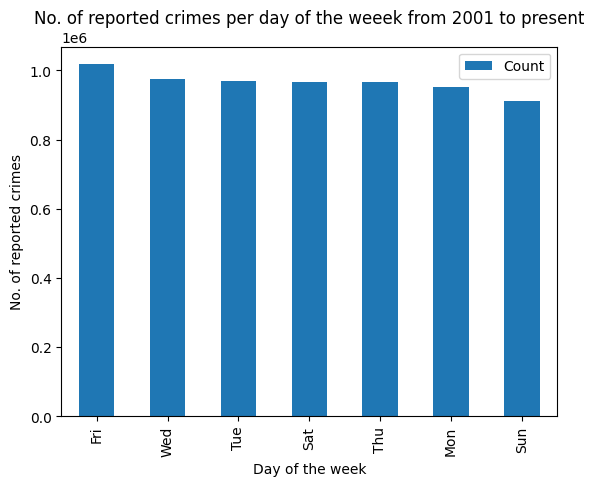

In [117]:
cp.sort_values('Count', ascending=False).plot(kind='bar', x='Day_of_the_week', y='Count')
plt.xlabel('Day of the week')
plt.ylabel('No. of reported crimes')
plt.title('No. of reported crimes per day of the weeek from 2001 to present')

## (05-01) RDDs setup

In [120]:
from pyspark import SparkContext
sc = SparkContext.getOrCreate()
psrdd= sc.textFile('police-station.csv')
psrdd.first()

'"district","district_name","address","city","state","zip","website","phone","fax","tty","x_coordinate","y_coordinate","latitude","longitude","location"'

In [121]:
ps_header = psrdd.first()

In [122]:
ps_rest = psrdd.filter(lambda line: line!=ps_header)
ps_rest.first()

'"Headquarters","Headquarters","3510 S Michigan Ave","Chicago","IL","60653","http://home.chicagopolice.org",,,,"1177731.401","1881697.404","41.83070169","-87.62339535","(41.8307016873, -87.6233953459)"'

**How many police stations are there?**

In [123]:
ps_rest.map(lambda line: line.split(',')).collect()

[['"Headquarters"',
  '"Headquarters"',
  '"3510 S Michigan Ave"',
  '"Chicago"',
  '"IL"',
  '"60653"',
  '"http://home.chicagopolice.org"',
  '',
  '',
  '',
  '"1177731.401"',
  '"1881697.404"',
  '"41.83070169"',
  '"-87.62339535"',
  '"(41.8307016873',
  ' -87.6233953459)"'],
 ['"18"',
  '"Near North"',
  '"1160 N Larrabee St"',
  '"Chicago"',
  '"IL"',
  '"60610"',
  '"http://home.chicagopolice.org/community/districts/18th-district-near-north/"',
  '"312-742-5870"',
  '"312-742-5771"',
  '"312-742-5773"',
  '"1172080.029"',
  '"1908086.527"',
  '"41.90324165"',
  '"-87.64335214"',
  '"(41.9032416531',
  ' -87.6433521393)"'],
 ['"19"',
  '"Town Hall"',
  '"850 W Addison St"',
  '"Chicago"',
  '"IL"',
  '"60613"',
  '"http://home.chicagopolice.org/community/districts/19th-district-town-hall/"',
  '"312-744-8320"',
  '"312-744-4481"',
  '"312-744-8011"',
  '"1169730.744"',
  '"1924160.317"',
  '"41.94740046"',
  '"-87.65151202"',
  '"(41.9474004564',
  ' -87.651512018)"'],
 ['"20"',

In [124]:
ps_rest.map(lambda line: line.split(',')).count()

24

**Display the District ID, District name, Address and Zip for the police station with District ID 7**



In [133]:
# this code does not work, the reason is a way of storing data
(ps_rest.filter(lambda line: line.split(',')[0] == "7").map(lambda line: (line.split(',')[0],
                                                         line.split(',')[1],
                                                         line.split(',')[2],
                                                         line.split(',')[5])).collect())

[]

In [131]:
result = (ps_rest
          .map(lambda line: line.strip('"').split('","'))
          .filter(lambda fields: fields[0] == "7")
          .map(lambda fields: (fields[0], fields[1], fields[2], fields[5]))
          .collect())

print(result)

[('7', 'Englewood', '1438 W 63rd St', '60636')]


**Police stations 10 and 11 are geographically close to each other. Display the District ID, District name, address and zip code**

In [132]:
result_10_11 = (ps_rest
          .map(lambda line: line.strip('"').split('","'))
          .filter(lambda fields: fields[0] in ["10", "11"])
          .map(lambda fields: (fields[0], fields[1], fields[2], fields[5]))
          .collect())

print(result_10_11)

[('10', 'Ogden', '3315 W Ogden Ave', '60623'), ('11', 'Harrison', '3151 W Harrison St', '60612')]
